In [157]:
import numpy as np
import matplotlib.pyplot as plt
import torch    


import sys
sys.path.append('..')

# reload in jupyter
%load_ext autoreload
%autoreload 2

from mix_NCA.utils_simulations import grid_to_channels_batch, train_nca_dyn, plot_nca_prediction, classification_update_net, plot_nca_prediction2, plot_automata_comparison_grid
from mix_NCA.NCA import NCA 
from mix_NCA.MixtureNCA import MixtureNCA
from mix_NCA.TissueModel import ComplexCellType, TissueModel, create_complex_model_example, plot_cell_type_evolution
from mix_NCA.MixtureNCANoise import MixtureNCANoise


# seet seed
np.random.seed(9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:

# load the histories
histories = np.load('histories.npy')


In [159]:
nca = NCA(update_net = classification_update_net(6 * 3,  n_channels_out = 6 * 2), hidden_dim = 128, maintain_seed = False, use_alive_mask = False, state_dim = 6, residual = False, distribution = "normal", device = "cuda:3")
nca.random_updates = True
nca.to("cuda:3")

NCA(
  (update): Sequential(
    (0): Conv2d(18, 128, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 12, kernel_size=(1, 1), stride=(1, 1))
    (3): Softmax(dim=1)
  )
)

In [160]:
train_nca_dyn(nca, histories,n_cell_types = 6, n_epochs=800, time_length = 35, update_every = 1, device = "cuda:3", lr = 1e-4)

Precomputing grid representations...


Training NCA (mse):   0%|          | 0/800 [00:00<?, ?it/s]

Training NCA (mse): 100%|██████████| 800/800 [01:18<00:00, 10.25it/s, loss=0.003392, window=0-35]


0.11870961205568165

In [161]:
current_state = grid_to_channels_batch([histories[4][0]], n_cell_types=6, device="cuda:3")
current_state = nca(current_state, num_steps=1, return_history = False)
current_state

tensor([[[[ 9.8185e-01,  9.8984e-01,  9.6751e-01,  ...,  9.5758e-01,
            9.9973e-01,  1.0237e+00],
          [ 9.5778e-01,  1.0189e+00,  9.9336e-01,  ...,  9.6611e-01,
            1.0711e+00,  1.0341e+00],
          [ 1.0365e+00,  9.8529e-01,  9.8720e-01,  ...,  9.5873e-01,
            9.3554e-01,  9.8866e-01],
          ...,
          [ 1.0832e+00,  1.0458e+00,  1.0068e+00,  ...,  9.7672e-01,
            1.0187e+00,  9.9591e-01],
          [ 9.6625e-01,  1.0106e+00,  9.6571e-01,  ...,  9.9791e-01,
            9.8624e-01,  9.4009e-01],
          [ 9.9694e-01,  9.0558e-01,  9.4468e-01,  ...,  9.5991e-01,
            1.0214e+00,  9.7704e-01]],

         [[-5.7327e-02, -5.1025e-02,  1.9798e-02,  ..., -1.7661e-02,
            3.1900e-02,  4.2737e-02],
          [-2.7627e-02, -6.7214e-02, -4.7557e-02,  ...,  8.9734e-03,
            1.3500e-01,  1.6472e-02],
          [-8.3269e-02, -8.3461e-02, -4.8952e-02,  ..., -1.2418e-02,
            1.4497e-02,  2.9653e-02],
          ...,
     

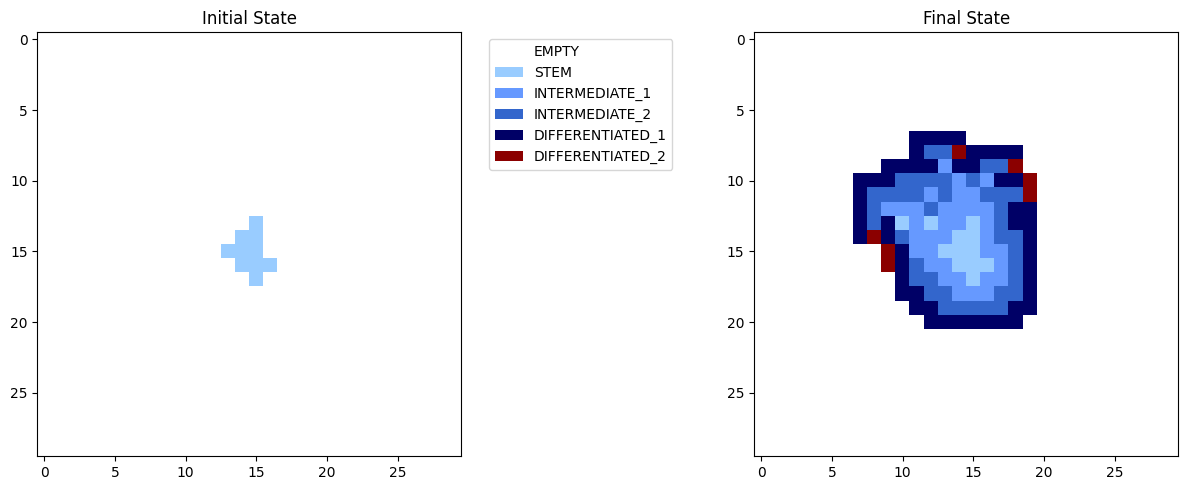

In [164]:
plot_nca_prediction(nca, histories[5][0],steps = 35,n_cell_types = 6, cell_type_enum = ComplexCellType, 
                    show_intermediate = False, device = "cuda:3", random = False, random_seed = 1)

In [165]:
# save the model
torch.save(nca.state_dict(), '../models/nca_model_with_noise.pt')